<h1>Credit card fraud detection<h1>

**Importing requirements and dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.seterr(all="ignore")
import warnings
warnings.simplefilter(action='ignore')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

from sklearn.neighbors import NearestCentroid

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("card_transdata.csv")
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Data Exploration**

In [4]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [5]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
frauds = data[data.fraud==1]

In [8]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


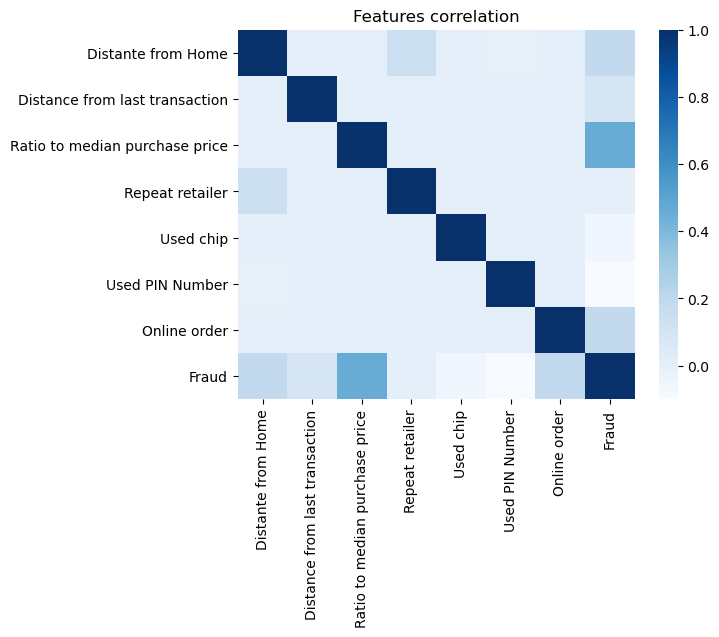

In [9]:
index = ['Distante from Home','Distance from last transaction','Ratio to median purchase price','Repeat retailer', 'Used chip','Used PIN Number','Online order', 'Fraud']
sns.heatmap(data.corr(), xticklabels=index, yticklabels=index,cmap='Blues')
plt.title("Features correlation")
plt.show()

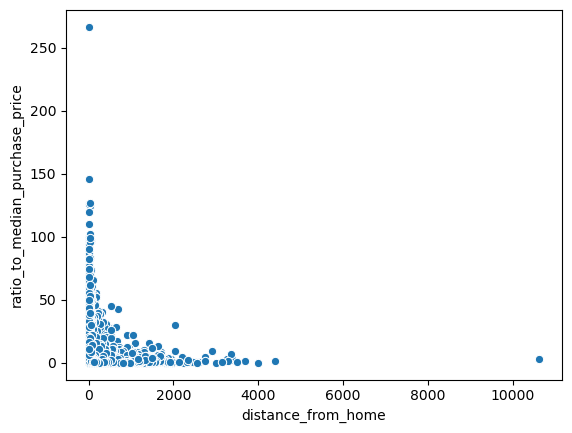

In [10]:
sns.scatterplot(data = frauds, x='distance_from_home',y='ratio_to_median_purchase_price')
plt.show()

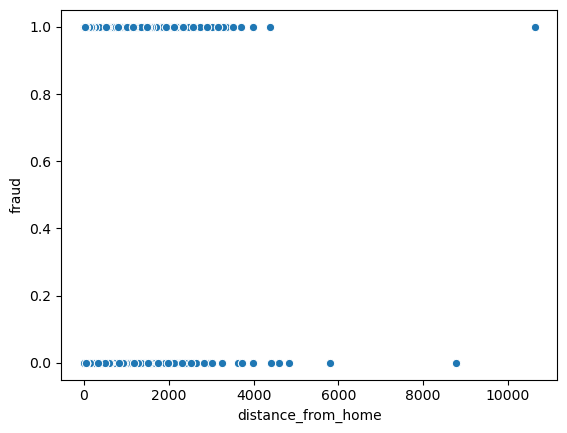

In [11]:
sns.scatterplot(data = data, x='distance_from_home',y='fraud')
plt.show()

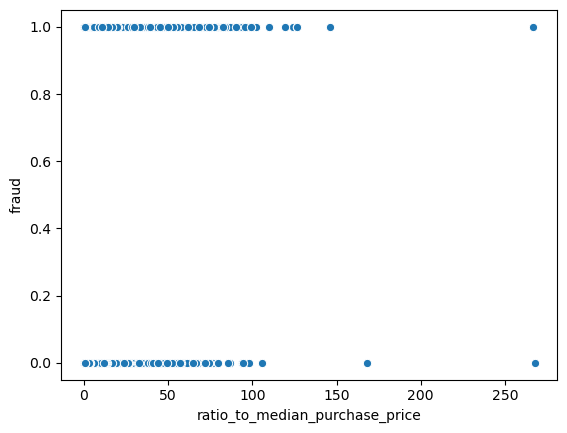

In [12]:
sns.scatterplot(data = data, x='ratio_to_median_purchase_price',y='fraud')
plt.show()

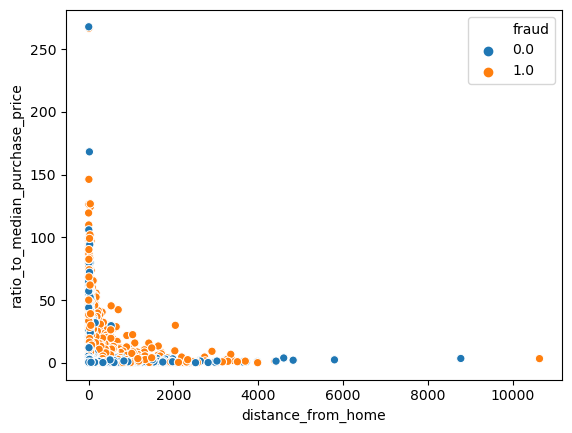

In [13]:
sns.scatterplot(data = data, x='distance_from_home',y='ratio_to_median_purchase_price', hue='fraud')
plt.show()

<h3>Clustering algorithms

<h4> Data creation and split<h4>

In [14]:
X = np.array(data.iloc[:,:-1])
Y = np.array(data.iloc[:,-1:])

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [15]:
def confusion_matrix_display(Y_real, Y_predic):
    ax = plt.subplot()
    sns.heatmap(confusion_matrix(Y_real,Y_predic), annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    #ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);
    plt.show()
    print(f'The F1 Score is {f1_score(Y_real,Y_predic)}')
    print(f'R2 score is: {r2_score(Y_real,Y_predic)}')


<h5> K means <h5>

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

Y_pred = kmeans.predict(X)

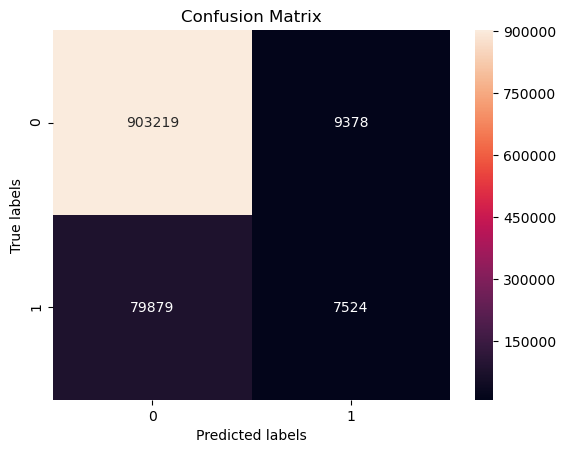

The F1 Score is 0.14426921048847133
R2 score is: -0.11901758009466668


In [17]:
confusion_matrix_display(Y,Y_pred)

In [18]:
iterations = 20
results = {'Iterations': [],
           'Algorithm': [],
           'F1': [],
           'R2': []
          }

conteo = 0
for n_iter in range(1, iterations+1):
    for algorithm in ["auto", "full", "elkan"]:
        kmeans_iter = KMeans(n_clusters=2, n_init=n_iter, algorithm = algorithm, random_state=42)
        Y_pred = kmeans_iter.fit_predict(X)
        f1 = f1_score(Y,Y_pred)
        r2 = r2_score(Y,Y_pred)
        #Append the results
        results['Iterations'].append(n_iter)
        results['Algorithm'].append(algorithm)
        results['F1'].append(f1)
        results['R2'].append(r2)
        conteo += 1
        print(f"Avance: {conteo/(iterations*3):.1%}", end='\r')

results_df = pd.DataFrame.from_dict(results)

In [19]:
best_f1 = results_df.iloc[results_df[['F1']].idxmax()]
best_f1

,Iterations,Algorithm,F1,R2
0,1,auto,0.144269,-0.119018


In [20]:
best_r2 = results_df.iloc[results_df[['R2']].idxmax()]
best_r2

,Iterations,Algorithm,F1,R2
0,1,auto,0.144269,-0.119018


In [21]:
kmeans_best = KMeans(n_clusters=2, n_init=1, algorithm = 'auto', random_state=42)
Y_pred_best = kmeans_best.fit_predict(X)

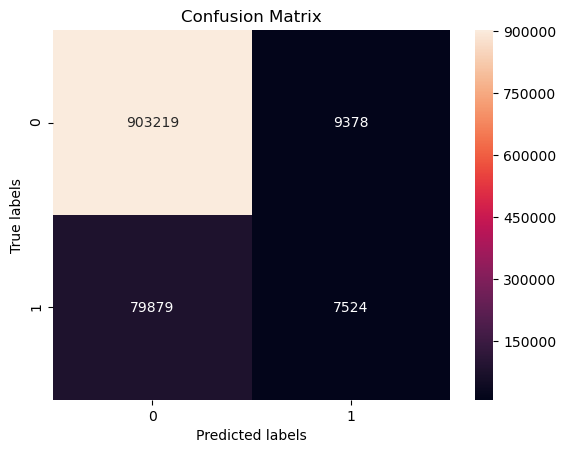

The F1 Score is 0.14426921048847133
R2 score is: -0.11901758009466668


In [22]:
confusion_matrix_display(Y,Y_pred_best)

In [23]:
Y_pred_best_inverse = Y_pred_best

for index in range(len(Y_pred_best)):
    Y_pred_best_inverse[index] = 1 if Y_pred_best[index] == 0 else 0

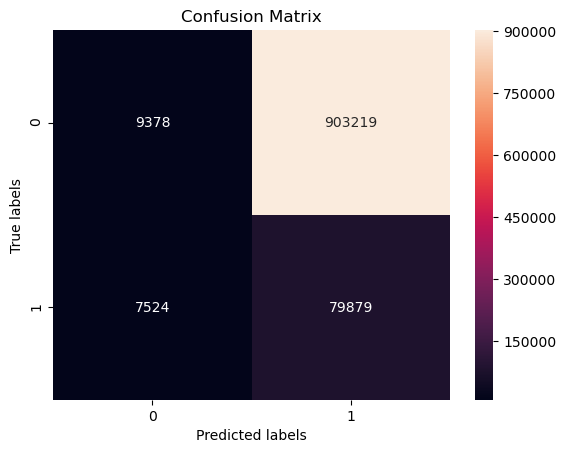

The F1 Score is 0.14923666582282502
R2 score is: -10.418011225429456


In [24]:
confusion_matrix_display(Y,Y_pred_best_inverse)

<h5> Agglomerative clusterings<h5>

In [25]:
X_part = X[:1000]
Y_part = Y[:1000]

In [26]:
ac = AgglomerativeClustering(n_clusters = 2)

Y_pred_ac = ac.fit_predict(X_part)

In [27]:
def get_clusters(model):
    clusters = {}
    for cluster_n in range(model.n_clusters):
        clusters[cluster_n] = []

    for index in range(len(X_part)):
        clusters[model.labels_[index]].append(X_part[index])
    
    return clusters

In [28]:
def get_centroid_model(clusters):
    centroids_model = np.zeros(shape = (len(clusters), len(clusters[0][0])))
    for cluster in clusters:
        centroids_model[cluster] = np.mean(clusters[cluster], axis = 0)
    return centroids_model

In [29]:
slice = 1000

episodes = int(X.shape[0]/slice)

centroids = np.zeros(shape = (episodes, 2, X.shape[1]))

for episode in range(episodes):
    X_slice = X[episode*slice:(episode+1)*slice]
    ac = AgglomerativeClustering(n_clusters = 2)
    ac.fit(X_slice)
    centroids[episode] = get_centroid_model(get_clusters(ac))
    print(f"Avance: {(episode+1)/(episodes):.1%}", end='\r')


In [30]:
ac_final = AgglomerativeClustering(n_clusters = 2)
X_final = centroids.reshape(centroids.shape[0]*centroids.shape[1],centroids.shape[2])

ac_final.fit(X_final)

centroids_final = get_centroid_model(get_clusters(ac_final))

compiled_model = KMeans(n_clusters = 2).fit(np.zeros(shape=(2, X_final.shape[1])))

compiled_model.cluster_centers_ = centroids_final

Y_final = compiled_model.predict(X)

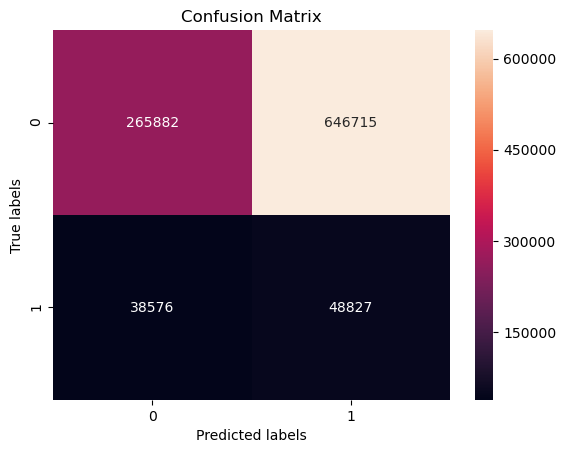

The F1 Score is 0.12472651335662148
R2 score is: -7.591513007166432


In [31]:
confusion_matrix_display(Y,Y_final)

<h3> MeanShift

In [35]:
db = MeanShift(bandwidth=100)

Y_db = db.fit_predict(X[:1000])

In [36]:
np.unique(db.labels_).sum()

15

In [78]:
window_size = 100
step =100
labels = 100

while labels > 2:
    ms = MeanShift(bandwidth=window_size, cluster_all=True)
    Y_db = ms.fit_predict(X[:1000])
    labels = len(ms.cluster_centers_)
    print(f"Windows size: {window_size}, Labels: {labels}", end='\r')
    window_size +=step
    if labels == 1:
        windows_size -= step
        step /= 10

In [85]:
centroids = []
slice = 1000

episodes = int(X.shape[0]/slice)

for episode in range(episodes):
    X_slice = X[episode*slice:(episode+1)*slice]
    window_size = 100
    step = 100
    labels = 100
    ##Fit the slice
    while labels > 2:
        ms = MeanShift(bandwidth=window_size, cluster_all=True)
        Y_ms = ms.fit_predict(X_slice)
        labels = len(ms.cluster_centers_)
        print(f"Episode: {episode+1}/{episodes}, Windows size: {window_size}, Labels: {labels}", end='\r')
        window_size +=step
        if labels == 1:
            window_size -= step
            step /= 10
    ##
    centroids.append(ms.cluster_centers_)
    #print(f"Avance: {(episode+1)/(episodes):.1%}", end='\r')

In [88]:
len(centroids[0])

2

In [89]:
centroids_flat = []

for episode in centroids:
    for centroid in episode:
        centroids_flat.append(centroid)
        
print(len(centroids_flat))

1817


In [90]:
window_size = 100
step =100
labels = 100

while labels > 2:
    ms = MeanShift(bandwidth=window_size, cluster_all=True)
    Y_ms_final = ms.fit_predict(centroids_flat)
    labels = len(ms.cluster_centers_)
    print(f"Windows size: {window_size}, Labels: {labels}", end='\r')
    window_size +=step
    if labels == 1:
        windows_size -= step
        step /= 10

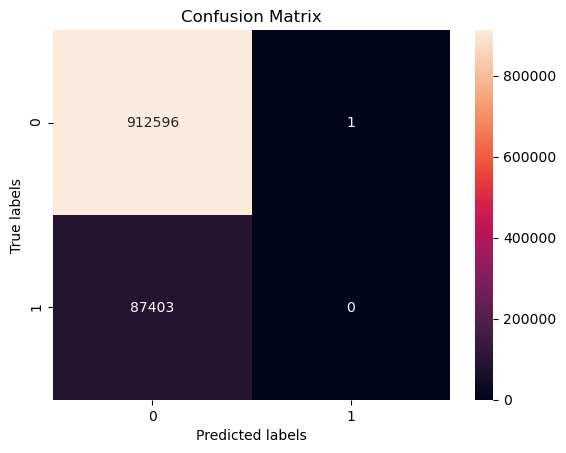

The F1 Score is 0.0
R2 score is: -0.09578646571803029


In [92]:
Y_ms_final = ms.predict(X)

confusion_matrix_display(Y,Y_ms_final)